In [2]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [18]:
input_file = 'data_singlevar_regr.txt'
data = np.genfromtxt(input_file, delimiter=', ', dtype='str')
data = [row.split(',') for row in data]
data = np.array(data, dtype=float)
X, Y = data[:, :-1], data[:, -1]

In [22]:
#data split
num_training = int(0.8*len(X))
num_test = len(X) - num_training

#training data
X_train, Y_train = X[:num_training], Y[:num_training]
X_test, Y_test = X[num_training:], Y[num_training:]

In [23]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train, Y_train)
Y_test_pred = regressor.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


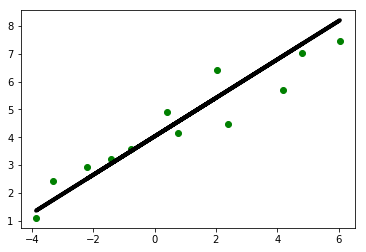

In [25]:
plt.scatter(X_test, Y_test, color='green')
plt.plot(X_test, Y_test_pred, color='black', linewidth=4)
plt.xticks()
plt.yticks()
plt.show()

In [27]:
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(Y_test, Y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(Y_test, Y_test_pred), 2))
print("R2 score =", round(sm.r2_score(Y_test, Y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [28]:
#save model
output_model_file = 'model.pkl'
with open(output_model_file, 'wb') as fp : 
    pickle.dump(regressor, fp)

In [29]:
#load model
with open(output_model_file, 'rb') as fp :
    regressor_model = pickle.load(fp)

In [30]:
Y_test_pred_new = regressor_model.predict(X_test)
print("New mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_test_pred_new),2))

New mean absolute error = 0.59
